In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

# Linear regressions and nn.Module
In this section I will discuss how to perform linear regressions using pytorch backpropagation and the basics of training pytorch models with instances of the nn.Module class.

To perform a simple linear regression with pytorch we need:
 
1. Specify an input feature in a torch tensor datatype named x
2. Specify a *desired result* that in this case could be a simple linear function $y = wx+b$
3. Initialize tensors for *w* and *b*. This tensors would be the `optimization parameters` and will require grad.
4. Define an optimization task that change the values of the optimization parameters in order to reduce the difference (loss) between the desired result `y` and the predicted result `y_hat`. This task is named`training task`. Inside this training task the `learning rate` is a `hyperparameter` that need to be 'manually' guessed (for now).
5. Update the parameters *w* and *b* in order to recalculate the predicted result. 

## Example 1. Simple linear regression 
Specifying the input feature tensor x 

In [2]:
x = torch.tensor(range(-5, 5)).float() # <- this is the only input feature

tensor([-11.,  -8.,  -5.,  -2.,   1.,   4.,   7.,  10.,  13.,  16.])

Defining a Desired result y

In [ ]:
w_gt = 3 # 'real' w
b_gt = 4 # 'real' b

# desired result 
y = w_gt * x + b_gt
y

Creating the parameters $w$ and $b$. This parameters will be updated in a training task

In [3]:
w = torch.randn(1, requires_grad=True) #new value of w to be calculated through the training
b = torch.randn(1, requires_grad=True) #new value of b to be calculated through the training
print(w, b)

tensor([0.0049], requires_grad=True) tensor([0.7546], requires_grad=True)


### Defining a training task with gradient descend
Remembering the definitions expressed in the notebook `gradient_descend_manual_model` and aplying for this case:

Since there is one training input feature (the tensor y) the mean squared loss function $C$ in terms of each pair, desired result $y_i$ and predicted result $\hat y_i$ is:

$$
\begin{eqnarray}  C = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{eqnarray} \tag{1}
$$ 

For the bias $b$ and the weight $w$ the gradient descent rules are:

\begin{eqnarray}
  w & \rightarrow & w' = w - \eta \frac{\partial C}{\partial w} \tag{2}\\
  b & \rightarrow & b' = b - \eta \frac{\partial C}{\partial b}
\tag{3}\end{eqnarray}

### Training function
In this function the `y_hat` is the predicted value of the label tensor `y` and is updated for every epoch with the updated `w` and `b` tensors. Since the tensor track is set on in the `w` and `b` tensors, when the backward method is called in the Mean Squared loss function we are calculating the partial derivative of C with respect to w and b ($\frac{\partial{C}}{\partial{w}}$, $\frac{\partial{C}}{\partial{b}}$) and those derivatives are stored in the .grad property of each tensor. The learning rule is applied to update `w` and `b` tensors and the gradient is restarted for the `w` and `b` tensors for a new gradient descent in the new epoch.

In [5]:
# training function

learning_rate = 0.1

def trainManual(w, b, lr, epoch):
    for i in range(epoch):
        # forward pass: with each new w and b, evaluate the tensor y_hat
        y_hat = w * x + b
        
        # compute the tensor error cost function c
        c = torch.sum(torch.pow(y-y_hat, 2)/y.numel())
        
        # backward pass: compute the gradients dC/dw for w, and dC/db for b
        c.backward()
        
        # gradient descend and updating parameters
        with torch.no_grad(): # Temporarily set all requires_grad=False
            # The -= operator updates w and b in-place without affecting the computational graph because gradient tracking is disabled.
            w -= lr*w.grad
            b -= lr*b.grad
            # restart the gradient descent with zero gradients for the next epoch
            w.grad.zero_()
            b.grad.zero_()
        print(f'w_pred: {w[0]:.4f}, b_pred: {b[0]:.4f}, error: {c:.4f}')

In [6]:
trainManual(w, b, learning_rate, epoch=20)

w_pred: 4.7720, b_pred: 1.1042, error: 77.0618
w_pred: 1.4700, b_pred: 1.8605, error: 40.2077
w_pred: 3.8570, b_pred: 2.1354, error: 21.2015
w_pred: 2.2136, b_pred: 2.5940, error: 11.3182
w_pred: 3.4099, b_pred: 2.7966, error: 6.1276
w_pred: 2.5927, b_pred: 3.0783, error: 3.3694
w_pred: 3.1929, b_pred: 3.2219, error: 1.8840
w_pred: 2.7872, b_pred: 3.3968, error: 1.0719
w_pred: 3.0887, b_pred: 3.4962, error: 0.6205
w_pred: 2.8875, b_pred: 3.6058, error: 0.3654
w_pred: 3.0393, b_pred: 3.6734, error: 0.2186
w_pred: 2.9398, b_pred: 3.7426, error: 0.1326
w_pred: 3.0164, b_pred: 3.7881, error: 0.0815
w_pred: 2.9673, b_pred: 3.8321, error: 0.0507
w_pred: 3.0061, b_pred: 3.8624, error: 0.0318
w_pred: 2.9820, b_pred: 3.8905, error: 0.0201
w_pred: 3.0017, b_pred: 3.9106, error: 0.0128
w_pred: 2.9899, b_pred: 3.9287, error: 0.0082
w_pred: 2.9999, b_pred: 3.9419, error: 0.0052
w_pred: 2.9942, b_pred: 3.9535, error: 0.0034


## Example 2. Training with torch.nn.Module

### Dataset for linear regression
Creating the input feature a column tensor of 50 linearly spaced elements

In [7]:
X = torch.linspace(1, 50, 50).reshape(-1, 1)
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


Creating a random array of error values of the same shape of the X column matrix (50,1)

In [8]:
torch.manual_seed(71)
e = torch.randint(-8, 9, (50,1), dtype=torch.float)
print(e)

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])


Creating the output feature a tensor for the linear function $y(x) = 2*x + 1$ plus an random error $e$ (noise)

In [9]:
y = 2*X + 1 + e
y.shape

torch.Size([50, 1])

In [ ]:
# in order to plot, first convert the tensors into numpy arrays
plt.scatter(X.numpy(), y.numpy())

## Definition of a model class
The next class customize instances of the pytorch `nn.Module` class with the aim of set the neural network architecture and a forward method according to the desired network architecture. The instances of this new class are used in the training algorithms and are often named 'model'. By default, the forward method must be named `forward` in order to use the syntactic sugar `model(X)` to perform the forward pass. Without this naming convention, `model(X)` would not perform the forward pass automatically.   

In [11]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__() #inherits the constructor method of the parent class (nn.Module)
        self.linear = nn.Linear(in_features, out_features) # the type of neural network layer that is employed here: Linear is a fully connected or Dense layer 
    
    def forward(self, x):
        y_pred = self.linear(x) #applies the linear transformation
        return y_pred

### What does nn.Linear() do?
The nn.Linear() layer in PyTorch performs a linear transformation of the input data in order to create the weights and biases that requires a model for the desired input features and the desired output features. Mathematically, for an input vector $x \in \mathbb{R}^n$, the linear layer computes: 

$$y = W x + b$$

Where:

- $W$ is the weight matrix
- $x$ is the input vector
- $b$ is the bias vector
- $y$ is the output vector

This linear transformation is also known as an affine transformation, which combines a linear transformation (through matrix multiplication) and a translation (through the bias).

#### Example, creating a model for 2 features and 2 outputs:

When you create a model with `model(2, 2)`, the linear layer is initialized as `nn.Linear(in_features=2, out_features=2)`. This means:

- The input tensor $X$ has 2 features (e.g,. $X = [x_1, x_2]$)
- The output tensor y will also have 2 values.

The linear transformation for this model is:
$$
y = W \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + b
= \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}
$$

which expands to: 

$$ y_1 = w_{11} x_1 + w_{12} x_2 + b_1 $$
$$ y_2 = w_{21} x_1 + w_{22} x_2 + b_2 $$
 
Thus, and this is important to understand in pytorch, when you call `model(X)` PyTorch performs this matrix multiplication and bias addition to return the transformed tensor $\hat{y}$ (forward pass). **These are part of the operations that will be tracked and later will be used in the training algorithm to perform the backpropagation pass**.

### How can be performed the training and optimization of a PyTorch model
Once the linear transformation is defined, the `model` is trained using a dataset to learn the optimal values for the weight matrix $W$ and bias vector $b$ through backpropagation and gradient descent. During each forward pass, the input data $X$ is transformed linearly, and the resulting output is used to compute the loss, which informs how the weights $W$ and biases $b$ needs to be updated in a training loop.

### Model instance for a linear regression
The only input feature in a linear regression is the $x$ tensor and the only "label" or output feature is the $y$ tensor then the model requires one input feature and one output feature. When an instance of the Model class is defined a set of biases and weights are being created as a properties of Linear.

In [12]:
torch.manual_seed(59) 

model = Model(1,1) # one simple feature x in, one simple out feature y
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


### PyTorch instances for the loss function and the optimizer (type of gradient descend)
For the definition of a training loop to update the values of the weights and the biases we can use PyTorch instances for the type of gradient descend also called *optimizer* and the type of loss function (commonly called *criterion*) that we want. Within the definition of the optimizer we need to pass an initial guessed learning rate in the "lr" parameter.

In [13]:
# setting the loss function: mean square error loss (the target function for the optimization)
criterion = nn.MSELoss()
print(criterion.type)

<bound method Module.type of MSELoss()>


In [14]:
# setting the learning rate as stochastic gradient descend, learning rate, lr = 0.01
# this could be used to update the weights and biases 
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
type(optimizer)

torch.optim.sgd.SGD

### Basic training loop for linear regression
The epochs are defined as: the entire pass or entire processing of the dataset that ends updating the biases and weights of the network. With this update, the next epoch will be closer and closer to the optimization. In order to reach an optimum number of epochs we need to track the losses.

In [15]:
epochs = 25
losses = []
for epoch in range(epochs):
    epoch += 1
    
    #to prevent the accumulation of the gradients steps in the next epoch
    #starting "fresh" for the next epoch
    optimizer.zero_grad()
    
    # prediction of y (forward pass)
    y_pred = model.forward(X)
    
    # calculate the loss (error)
    loss = criterion(y_pred, y)
    
    # record the error
    losses.append(loss.detach().numpy())
    
    print(f'epoch: {epoch}, loss: {loss.item()}, weight: {model.linear.weight.item()}, bias {model.linear.bias.item()}')
    
    #find the derivatives with respect to the loss function (backward step)
    # the derivatives of the weights and biases will be stored inside the 'model' object  (see the notebook 'computational_graph_from_scratch.ipynb' to look simple examples of how could be done this with OOP)
    loss.backward() 
    
    #apply gradient descent with the derivatives calculated in the previous step to minimize the weight and the bias parameters and update this values inside the 'model' object 
    optimizer.step()

epoch: 1, loss: 3057.216796875, weight: 0.10597813129425049, bias 0.9637961387634277
epoch: 2, loss: 1588.5311279296875, weight: 3.334900379180908, bias 1.0604636669158936
epoch: 3, loss: 830.2999877929688, weight: 1.0148327350616455, bias 0.9922628402709961
epoch: 4, loss: 438.8524169921875, weight: 2.6817996501922607, bias 1.0425218343734741
epoch: 5, loss: 236.7615203857422, weight: 1.4840211868286133, bias 1.0076650381088257
epoch: 6, loss: 132.4291229248047, weight: 2.3446059226989746, bias 1.0339646339416504
epoch: 7, loss: 78.56572723388672, weight: 1.7262253761291504, bias 1.0163217782974243
epoch: 8, loss: 50.75775909423828, weight: 2.170504093170166, bias 1.0302516222000122
epoch: 9, loss: 36.4012336730957, weight: 1.8512457609176636, bias 1.0214954614639282
epoch: 10, loss: 28.989229202270508, weight: 2.0806007385253906, bias 1.029038906097412
epoch: 11, loss: 25.162382125854492, weight: 1.9157683849334717, bias 1.0248701572418213
epoch: 12, loss: 23.186473846435547, weight:

Text(0.5, 0, 'Epoch')

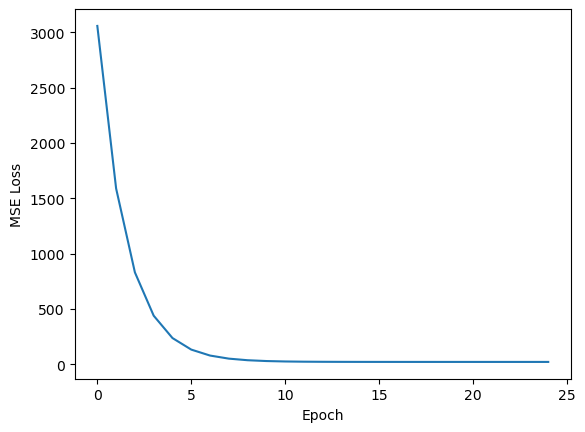

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

In [17]:
x = np.linspace(0, 50, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*x + current_bias

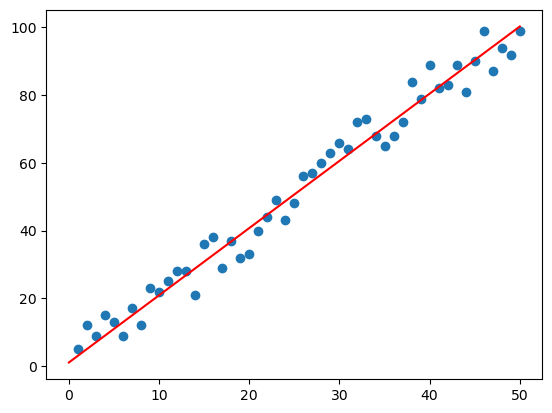

In [18]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')